In [11]:
import graphviz

#Entscheidungsbaum
class ANDNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return str(self.nodes)

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    mat[x].pop(y)
                    for node in self.nodes:
                        mat[x].append(node)
                        
        for node in self.nodes:
            node.topdown(mat)                       
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " &", shape='box')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph     

class ORNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return str(self.nodes)

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    for node in self.nodes[:-1]:
                        mat.append(mat[x][:y] + [node] + mat[x][y+1:])
                    mat[x][y] = self.nodes[-1]
                        
        for node in self.nodes:
            node.topdown(mat)
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " >-", shape='diamond')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph
    
class EVENT:
    def __init__(self,name):
        self.name = name
    
    def __repr__(self):
        return str(self.name)
        
    def topdown(self, mat):
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name, shape='circle')
        return graph
    

#Binärbaum -------------------------------------------------------------------------------------------------------------------    
class CONNECT:
    def __init__(self, name) -> None:
        self.name = name
        self.con = None

    def getname(self):
        return self.name
    
class NODE:
    def __init__(self, name):
        self.name = name
        self.zero = CONNECT("ZERO")
        self.one = CONNECT("ONE")

    def getname(self):
        return self.name
    
class BDDEVENT: 
    def __init__(self,name):                
        self.name = name
        self.zero = None                        # linkes Anhängsel des Events
        self.one = None                       # rechtes Anhängsel des Events

    def getname(self):
        return self.name
    
class FT2BDD:
    def __init__(self):
        self.nroot = None
        self.bdd = {"stumb0":[], "stumb1":[]}                    
        
    def show(self):
        return self.dot
                                                        
    def create(self,ntop,ft):                        
        if ntop == None:                        # Falss es den Top-Knoten nicht gibt, 
            ntop = NODE("root")                 # erstelle einen Node mit dem Namen root

        if self.nroot == None:                  # Falls aktueller nroot kein Wert zugewiesen hat,
            self.nroot = ntop                   # setze ihn auf ntop

        if isinstance(ft, ANDNODE):             # Falls ft ein Andnode ist,        
            self.createand(ntop,ft)             # rufe die Funktion createand auf

        elif isinstance(ft, ORNODE):            # Falls ft ein Ornode ist,
            self.createor(ntop,ft)              # rufe die Funktion createor auf

        else:
            assert(0 > 1)
        
        return ntop

    def createand(self,ntop,ft):                  
        temp = ""
        for node in ft.nodes:
            type(node)
            if isinstance(node, EVENT):
                bdd["stumb0"].append(node.name)
                if temp != "":                          #Wenn temp nicht leer ist also nicht das erste Child ist
                    if node.name in bdd.keys():         #Schauen ob es schon einen Key des Childs gibt
                        bdd[str(node.name)] = list()    #Neuen Key für das neue Child anlegen 
                    bdd[str(node.name)].append(temp)    #Value des vorgänger Childs anfügen

                temp = node.name
        bdd["stumb1"].append(temp)

        return ntop

    def createor(self, ntop,ft):                    
        print("->createor")
        print("<-createor")
        return ntop
    
TOP = ANDNODE("TOP")
E1 = EVENT("1")
E2 = EVENT("2")

TOP.add(E1)
TOP.add(E2)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

bdd = FT2BDD()
bdd.create(None,TOP)
#bdd.show()

Zusammensetzung TOP:  [1, 2]
[[1, 2]]


<>:140: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:140: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_17035/3065786709.py:140: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if temp is not "":                          #Wenn temp nicht leer ist also nicht das erste Child ist


TypeError: 'FT2BDD' object is not subscriptable

In [15]:
test = {"stump0":[1,2], "stump1":[2], 1:[], 2:[1]}
test[2].append(2)
test[2]


[1, 2]

# Martin sein Code

In [48]:
import graphviz as gv
class ANDNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []
        
    def add(self,node):
        self.nodes.append(node)
        
    def draw(self):
        graph = gv.Graph()
        self.add_node(graph)
        graph.render('result.gv', view = True)
        
    def add_node(self, graph):
        graph.node(self.name, self.name + '\n(&)')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.add_node(graph)
    
    def availability(self):
        product = 1
        for i in self.nodes:
            product *= (1-i.availability()) # U = Produkte der Nichtverfügbarkeiten
        self.avail = 1 - product # V = 1 - U
        return self.avail
    
class ORNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []
        
    def __repr__(self):
        return self.name
        
    def add(self,node):
        self.nodes.append(node)
        
    def draw(self):
        graph = gv.Graph()
        self.add_node(graph)
        graph.render('result.gv', view = True)
        
    def add_node(self, graph):
        graph.node(self.name, self.name + '\n(<=1)')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.add_node(graph)
    
class EVENT:
    def __init__(self,name,la,mu):
        self.name = name
        self.la = la
        self.mu = mu
        
    def __repr__(self):
        return self.name
        
    def add_node(self,graph):
        graph.node(self.name, self.name)
        
    def nonavailability(self):
        self.nonavail = self.la / (self.la + self.mu) # U = lambda/(lambda+mü)
        return self.nonavail
    
    def availability(self):
        self.avail = 1 - self.nonavailability() 
        return self.avail

    def availability(self):
        product = 1
        for i in self.nodes:
            product *= i.availability() # V = Produkte der Verfügbarkeiten
        self.avail = product
        return self.avail

class NODE:
    def __init__(self, name):
        self.name = name
        self.nodes = []                         # Liste mit Anhängseln
        self.left = None                        # linkes Anhängsel des Knotens
        self.right = None                       # rechtes Anhängsel des Knotens

    def __repr__(self) -> str:
        return str(self.nodes)

    def getname(self):
        return self.name

class BDDEVENT: 
    def __init__(self,name):                
        self.name = name
        self.left = None                        # linkes Anhängsel des Events
        self.right = None                       # rechtes Anhängsel des Events

    def __repr__(self) -> str:
        return str(self.name)

    def getname(self):
        return self.name

class FT2BDD:
    def __init__(self):
        self.nroot = None                       # Wurzelknoten
        self.ZERO = "Stub0"                     # linke Null des BDD
        self.ONE = "Stub1"                      # rechte Eins des BDD
        self.new_nodes = []                     # Knoten des BDD

    def __repr__(self) -> str:
        return str(self.new_nodes)
        
    def show(self):
        bdd_graph = gv.Digraph("Graph")                             
        bdd_graph.attr("graph",splines="spline")                           
        for element in self.new_nodes:                                 # läuft über die liste new_nodes de BDD
            if isinstance(element,BDDEVENT):                           # Falls das Element ein BDDEvent ist,
                if isinstance(element.left, BDDEVENT):                 # Falls das linke Element ein BDDEvent ist,
                    bdd_graph.edge(element.name, element.left.name)    # erstelle Kante vom BDDEvent an das linke BDDEvent
                else:                                                  # sonst
                    bdd_graph.edge(element.name, element.left)         # erstelle Kante vom BDDEvent an die linke Null (Stub0)
                if isinstance(element.right, BDDEVENT):                # falls das rechte ELement ein BDDEvent ist, 
                    bdd_graph.edge(element.name, element.right.name)   # erstelle Kante vom BDDEvent an das rechte BDDEvent
                else:                                                  # sonst
                    bdd_graph.edge(element.name, element.right)        # erstelle Kante vom BDDEvent an die rechte Eins (Stub1)    
        bdd_graph.render('result2.gv', view = True)                    # speichert Graph im PDF
                                                        
    def create(self,ntop,ft):                        
        if ntop == None:                        # Falss es den Top-Knoten nicht gibt, 
            ntop = NODE("root")                 # erstelle einen Node mit dem Namen root

        if self.nroot == None:                  # Falls aktueller nroot kein Wert zugewiesen hat,
            self.nroot = ntop                   # setze ihn auf ntop

        if isinstance(ft, ANDNODE):             # Falls ft ein Andnode ist,        
            self.createand(ntop,ft)             # rufe die Funktion createand auf
        elif isinstance(ft, ORNODE):            # Falls ft ein Ornode ist,
            self.createor(ntop,ft)              # rufe die Funktion createor auf
        else:
            print(ft.name)                      # sonst Fehlermeldung         
            assert(False)

    def createand(self,ntop,ft):                  
        print("->createand")
        temp_nodes = []
        
        for element in ft.nodes:                                                                            # For-Schleife über die angeehängten Elemente von ft                     
            if isinstance(element,EVENT) or isinstance(element,ANDNODE) or isinstance(element,ORNODE):      # Falls das Element ein Event, ein Andnode oder ein Ornode ist,
                node = BDDEVENT(element.name) if isinstance(element, EVENT) else NODE(element.name)         # erstelle ein BDDEvent mit dem Namen des Events, des Andnode oder des Ornode und weise es der Var. node zu                 
                temp_nodes.append(node)                                                                     # hänge node an die Liste temp_nodes
                self.new_nodes.append(node)                                                                 # hänge node an die Liste new_nodes
        
        temp_nodes[0].left, temp_nodes[1].left = self.ZERO, self.ZERO                                   # hängt an den ersten und zweiten Listeneintrag (Node oder BDD Event) links die Null an                    
        temp_nodes[0].right, temp_nodes[1].right = temp_nodes[1], self.ONE                              # hängt an den ersten Listeneintrag rechts den zweiten Listeneintrag, an den zweiten rechts die Eins an
        # -> Andnode ist rechtsläufig

        list(map(lambda e: self.create(ntop, e), filter(lambda e: not isinstance(e, EVENT), ft.nodes))) # falls das Element aus ft.nodes kein Event ist, rufe create mit diesem Knoten auf
        
        for element in temp_nodes:                          # laufe über temp_nodes         
            if isinstance(element.right, NODE):             # wenn der rechte Kindknoten eine Knoten ist,                        
                temp_name = ""
                for old_node in ft.nodes:                   # laufe über ft_nodes
                    if old_node.name != element.name:       # falls der Knoten aus dem Fehlerbaum ungleich ist zu dem Knoten aus temp_nodes
                        temp_name = old_node.nodes[0].name  # weise temp_name den Namen des Kindknotens zu
                for new_node in self.new_nodes:             # laufe über self.new_nodes     
                    if new_node.name == temp_name:          # falls der Knoten den gleichen Namen hat wie die Variable temp_name,
                        element.right = new_node            # weise dem rechten Element den neuen Namen zu.
                
        print("<-createand")
        #return ntop

    def createor(self, ntop,ft):                    
        print("->createor")
        temp_nodes = []

        for element in ft.nodes:
            if isinstance(element,EVENT) or isinstance(element,ANDNODE) or isinstance(element,ORNODE): 
                node = BDDEVENT(element.name) if isinstance(element, EVENT) else NODE(element.name)                 
                temp_nodes.append(node)         
                self.new_nodes.append(node)     
                
        temp_nodes[0].left, temp_nodes[1].left = temp_nodes[1], self.ZERO
        temp_nodes[0].right, temp_nodes[1].right = self.ONE, self.ONE
        # -> Ornode ist linksläufig
               
        list(map(lambda e: self.create(ntop, e), filter(lambda e: not isinstance(e, EVENT), ft.nodes)))
         
        for element in temp_nodes:
            if isinstance(element.left, NODE):
                temp_name = ""
                for old_node in ft.nodes:
                    if old_node.name != element.name: 
                        temp_name = old_node.nodes[0].name 
                for new_node in self.new_nodes:
                    if new_node.name == temp_name:
                        element.left = new_node

        print("<-createor")
        #return ntop

# Fehlerbaum aus Aufgabe:
TOP = ANDNODE("TOP (&)")
#A = ANDNODE("A")
E1 = EVENT("E1", 1/1000, 1/4)
E2 = EVENT("E2", 1/1000, 1/4)
#E3 = EVENT("E3", 1/1000, 1/4)

TOP.add(E1)
TOP.add(E2)
#A.add(E2)
#A.add(E3)

bdd = FT2BDD()
bdd.create(None,TOP)
bdd.show()

->createand
<-createand


# Einzelnes OR oder einzelnes AND möglich

Zusammensetzung TOP:  [1, 2]
[[2], [1]]


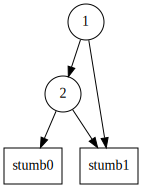

In [49]:
import graphviz

#Entscheidungsbaum
class ANDNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return str(self.nodes)

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    mat[x].pop(y)
                    for node in self.nodes:
                        mat[x].append(node)
                        
        for node in self.nodes:
            node.topdown(mat)                       
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " &", shape='box')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph     

class ORNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return str(self.nodes)

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    for node in self.nodes[:-1]:
                        mat.append(mat[x][:y] + [node] + mat[x][y+1:])
                    mat[x][y] = self.nodes[-1]
                        
        for node in self.nodes:
            node.topdown(mat)
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " >-", shape='diamond')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph
    
class EVENT:
    def __init__(self,name):
        self.name = name
    
    def __repr__(self):
        return str(self.name)
        
    def topdown(self, mat):
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name, shape='circle')
        return graph
    

#Binärbaum -------------------------------------------------------------------------------------------------------------------    
class FT2BDD:
    def __init__(self):
        self.bdd = {"stumb0":[], "stumb1":[]}    

    def __repr__(self) -> str:
        return str(self.bdd) 

    def getKeys(self):
        return self.bdd.keys()               
                                                        
    def create(self, tree):                        
        if isinstance(tree, ANDNODE):
            self.createand(tree)

        elif isinstance(tree, ORNODE):
            self.createor(tree)

    def createand(self, parent):                  
        temp = ""
        for child in parent.nodes:
            if isinstance(child, EVENT):
                self.bdd["stumb0"].append(child.name)        #Bei AND kann immer auf 0 verbunden werden      
                if child.name not in self.getKeys():         #Schauen ob es schon einen Key des Childs gibt
                    self.bdd[str(child.name)] = list()       #Neuen Key für das neue Child anlegen falls dieser noch nicht vorhanden ist
                self.bdd[str(child.name)].append(temp)       #Value des vorgänger Childs anfügen

                temp = child.name
        self.bdd["stumb1"].append(temp)                     


    def createor(self, parent):                    
        temp = ""
        for child in parent.nodes:
            if isinstance(child, EVENT):
                self.bdd["stumb1"].append(child.name)       #Bei AND kann immer auf 0 verbunden werden
                if child.name not in self.getKeys():        #Schauen ob es schon einen Key des Childs gibt
                    self.bdd[str(child.name)] = list()      #Neuen Key für das neue Child anlegen falls dieser noch nicht vorhanden ist 
                self.bdd[str(child.name)].append(temp)      #Value des vorgänger Childs anfügen

                temp = child.name
        self.bdd["stumb0"].append(temp)

    def show(self, graph):
        for key in self.bdd:
            if key == "stumb0" or key == "stumb1":
                graph.node(key, key, shape='box')
            else:
                graph.node(key, key, shape='circle')

            for edge in self.bdd.get(key):
                if edge != "":
                    graph.edge(key, edge, dir="back")

        return graph


    
TOP = ORNODE("TOP")
E1 = EVENT("1")
E2 = EVENT("2")

TOP.add(E1)
TOP.add(E2)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

bdd = FT2BDD()
bdd.create(TOP)

g = graphviz.Digraph()
g.attr(rankdir='BT')
bdd.show(g)

# Versuch nun komplexere Bäume zu erzeugen

Zusammensetzung TOP:  AND Node TOP
[[2, 3, 4], [1, 3, 4]]


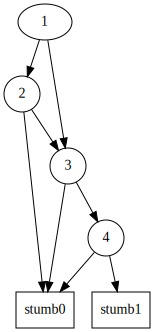

In [44]:
import graphviz

#Entscheidungsbaum
class ANDNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return "AND Node " + self.name

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    mat[x].pop(y)
                    for node in self.nodes:
                        mat[x].append(node)
                        
        for node in self.nodes:
            node.topdown(mat)                       
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " &", shape='box')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph     

class ORNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return "OR Node " + self.name

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    for node in self.nodes[:-1]:
                        mat.append(mat[x][:y] + [node] + mat[x][y+1:])
                    mat[x][y] = self.nodes[-1]
                        
        for node in self.nodes:
            node.topdown(mat)
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " >-", shape='diamond')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph
    
class EVENT:
    def __init__(self,name):
        self.name = name
    
    def __repr__(self):
        return str(self.name) 
        
    def topdown(self, mat):
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name, shape='circle')
        return graph
    

#Binärbaum -------------------------------------------------------------------------------------------------------------------    
class FT2BDD:
    def __init__(self):
        self.bdd = {"stumb0":[], "stumb1":[]}    

    def __repr__(self) -> str:
        return str(self.bdd) 

    def getKeys(self):
        return self.bdd.keys()               
                                                        
    def create(self, tree):                        
        if isinstance(tree, ANDNODE):
            self.createand(tree)

        elif isinstance(tree, ORNODE):
            self.createor(tree)

    def createand(self, parent):                  
        temp = ""
        temp2 = ""
        #Falls parent als value vorhanden ist dieses löschen 
        for key in self.bdd:
            if parent.name in self.bdd[key] and key != "stumb0" and key != "stumb1":
                try:
                    temp2 = key
                    self.bdd[key].remove(parent.name)
                except:
                    continue
        
        try:
            self.bdd[str(parent.nodes[0])] = self.bdd.pop(parent.name)
        except:
            pass

        for child in parent.nodes:
            if temp2 == "":
                self.bdd["stumb0"].append(child.name)        #Bei AND kann immer auf 0 verbunden werden
            else:
                self.bdd[temp2].append(child.name)  

            if child.name not in self.getKeys():         #Schauen ob es schon einen Key des Childs gibt
                self.bdd[str(child.name)] = list()       #Neuen Key für das neue Child anlegen falls dieser noch nicht vorhanden ist
            self.bdd[str(child.name)].append(temp)       #Value des vorgänger Childs anfügen

            temp = child.name 

        try:
            self.bdd["stumb1"].remove(parent.name)
        except:
            pass
        try:
            self.bdd["stumb0"].remove(parent.name)    
        except:
            pass

        self.bdd["stumb1"].append(temp)

        for child in parent.nodes:
            if isinstance(child, ANDNODE):
                self.createand(child)

            elif isinstance(child, ORNODE):
                self.createor(child)                  


    def createor(self, parent):                    
        temp = ""
        temp2 = ""
        #Falls parent als value vorhanden ist dieses löschen 
        for key in self.bdd:
            if parent.name in self.bdd[key] and key != "stumb0" and key != "stumb1":
                try:
                    temp2 = key
                    self.bdd[key].remove(parent.name)
                except:
                    continue

        for child in parent.nodes:
            #self.bdd["stumb1"].append(child.name)       #Bei AND kann immer auf 0 verbunden werden

            if temp2 == "":
                self.bdd["stumb1"].append(child.name)        #Bei AND kann immer auf 0 verbunden werden
            else:
                self.bdd[temp2].append(child.name)

            if child.name not in self.getKeys():        #Schauen ob es schon einen Key des Childs gibt
                self.bdd[str(child.name)] = list()      #Neuen Key für das neue Child anlegen falls dieser noch nicht vorhanden ist 
            self.bdd[str(child.name)].append(temp)      #Value des vorgänger Childs anfügen

            temp = child.name

        try:
            self.bdd["stumb0"].remove(parent.name)
        except:
            pass
        try:
            self.bdd["stumb1"].remove(parent.name)    
        except:
            pass

        self.bdd["stumb0"].append(temp)

        for child in parent.nodes:
            if isinstance(child, ANDNODE):
                self.createand(child)
            elif isinstance(child, ORNODE):
                self.createand(child)

        return 

    def show(self, graph):
        for key in self.bdd:
            if self.bdd[key] != [""]:
                if key == "stumb0" or key == "stumb1":
                    graph.node(key, key, shape='box')
                else:
                    graph.node(key, key, shape='circle')

                for edge in self.bdd.get(key):
                    if edge != "":
                        graph.edge(key, edge, dir="back")

        return graph


    
TOP = ANDNODE("TOP")
A = ORNODE("A")
B = ANDNODE("B")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")

TOP.add(A)
TOP.add(B)
A.add(E1)
A.add(E2)
B.add(E3)
B.add(E4)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

bdd = FT2BDD()
bdd.create(TOP)

g = graphviz.Digraph()
g.attr(rankdir='BT')
bdd.show(g)

Zusammensetzung TOP:  AND Node TOP
[[4, 1, 2], [3, 1, 2]]


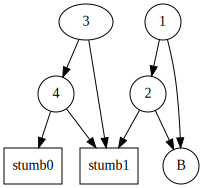

In [47]:
TOP = ANDNODE("TOP")
A = ANDNODE("A")
B = ORNODE("B")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")

TOP.add(A)
TOP.add(B)
A.add(E1)
A.add(E2)
B.add(E3)
B.add(E4)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

bdd = FT2BDD()
bdd.create(TOP)

g = graphviz.Digraph()
g.attr(rankdir='BT')
bdd.show(g)